# Chargement MNIST

In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784')

# Comparaison des Méthodes

## 1. Différents échantillons du jeu de données

Pour la comparaison on utilise 3 échantillons du jeu de données, comprenant des nombres différents de données d'apprentisssage mais ayant tous le même nombre de données test. 

In [5]:
from sklearn.model_selection import train_test_split
from numpy.random import randint
nbre_test=2000
nbre_app=[2500,10000,40000]
sets=[]
for nbre in nbre_app:
    indices_random=randint(70000,size=nbre+nbre_test)
    sets.append(train_test_split(mnist.data[indices_random], 
                                                    mnist.target[indices_random], 
                                                    train_size=(nbre/(nbre+nbre_test))
                                                   ))
    

In [4]:
from time import time

## 2. Méthode K-NN

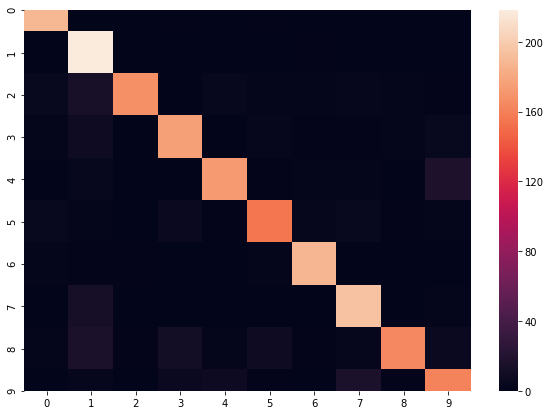

Accuracy: 0.893, Précision: 0.893, Recall:0.893, Temps d'apprentissage: 0.08182168006896973 seconde, Temps prédiction: 1.1078081130981445 secondes
 


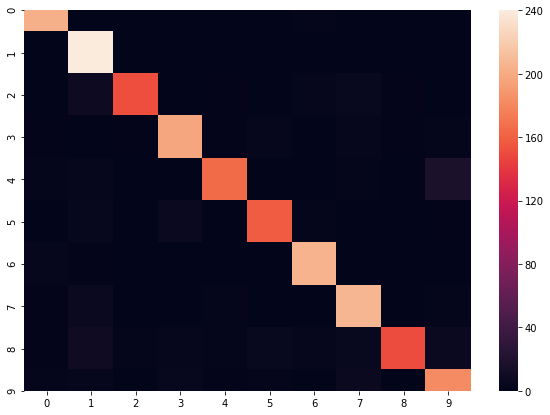

Accuracy: 0.929, Précision: 0.929, Recall:0.929, Temps d'apprentissage: 0.5564868450164795 seconde, Temps prédiction: 4.754735469818115 secondes
 


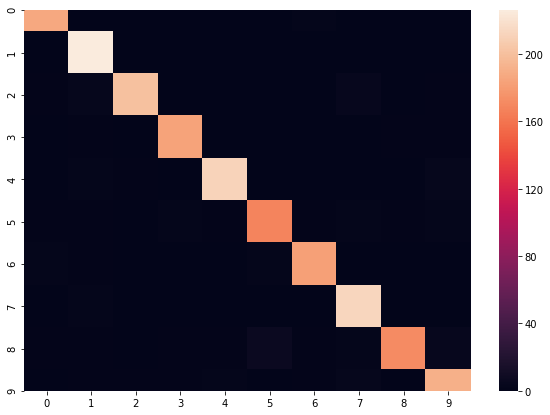

Accuracy: 0.9675, Précision: 0.9675, Recall:0.9675, Temps d'apprentissage: 6.100691080093384 seconde, Temps prédiction: 19.245370149612427 secondes
 


In [19]:
from sklearn import neighbors
from sklearn.metrics import precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
%matplotlib inline

k=5

for aset in sets:
    xtrain, xtest, ytrain, ytest = aset
    tps1=time()
    clf= neighbors.KNeighborsClassifier(k,p=1,n_jobs=-1).fit(xtrain,ytrain)
    tps2=time()
    tpsapp=tps2-tps1
    score=clf.score(xtest,ytest)
    tps1=time()
    ypred=ypred=clf.predict(xtest)
    tps2=time()
    tpspred=tps2-tps1
    
    prec=precision_score(ytest,ypred,average="micro")
    recall=recall_score(ytest,ypred,average="micro")
    
    cm = confusion_matrix(ytest, ypred, labels=clf.classes_)
    df_cm= pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm)
    plt.show()
        
    print(f"Accuracy: {score}, Précision: {prec}, Recall:{recall}, Temps d'apprentissage: {tpsapp} seconde, Temps prédiction: {tpspred} secondes")
    print(" ")

## 3. Méthode A-NN

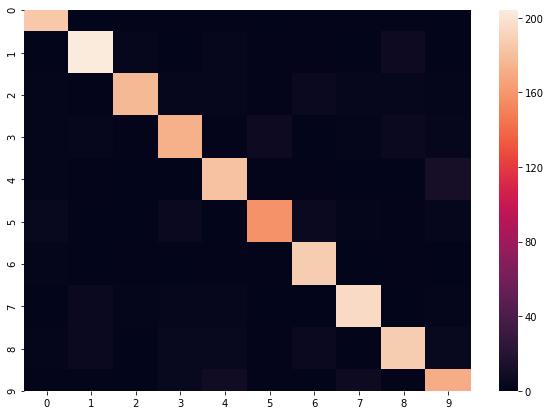

Accuracy: 0.9105, Précision: 0.9105, Recall:0.9105, Temps d'apprentissage: 10.38639783859253 seconde, Temps prédiction: 0.07280516624450684 secondes
 


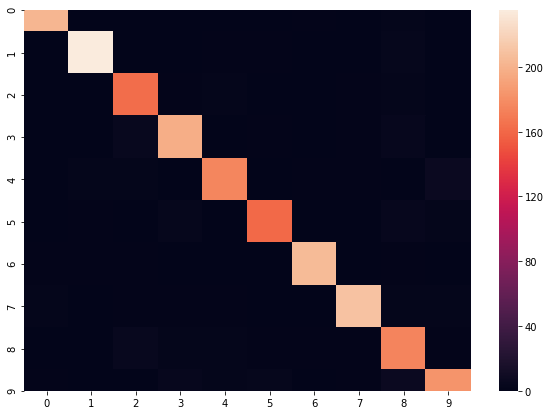

Accuracy: 0.954, Précision: 0.954, Recall:0.954, Temps d'apprentissage: 32.51012945175171 seconde, Temps prédiction: 0.07380247116088867 secondes
 


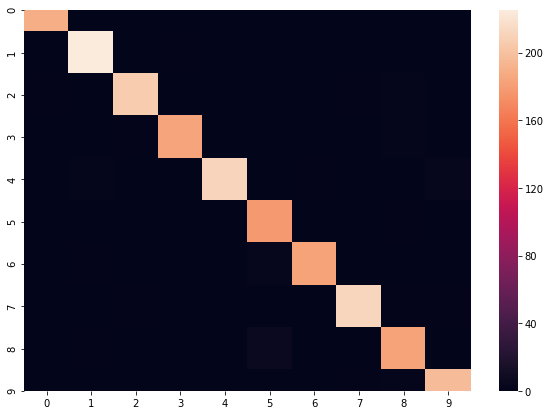

Accuracy: 0.984, Précision: 0.984, Recall:0.984, Temps d'apprentissage: 251.4882915019989 seconde, Temps prédiction: 0.08976006507873535 secondes
 


In [20]:
from sklearn.neural_network import MLPClassifier

for aset in sets:
    xtrain, xtest, ytrain, ytest = aset
    tps1=time()
    clf= MLPClassifier(hidden_layer_sizes=(149, 176, 86, 60, 277, 290, 55, 185, 196, 171)).fit(xtrain,ytrain)
    tps2=time()
    tpsapp=tps2-tps1
    score=clf.score(xtest,ytest)
    tps1=time()
    ypred=ypred=clf.predict(xtest)
    tps2=time()
    tpspred=tps2-tps1
    
    prec=precision_score(ytest,ypred,average="micro")
    recall=recall_score(ytest,ypred,average="micro")
    
    cm = confusion_matrix(ytest, ypred, labels=clf.classes_)
    df_cm= pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm)
    plt.show()
        
    print(f"Accuracy: {score}, Précision: {prec}, Recall:{recall}, Temps d'apprentissage: {tpsapp} seconde, Temps prédiction: {tpspred} secondes")
    print(" ")

## 4. Méthode SVM

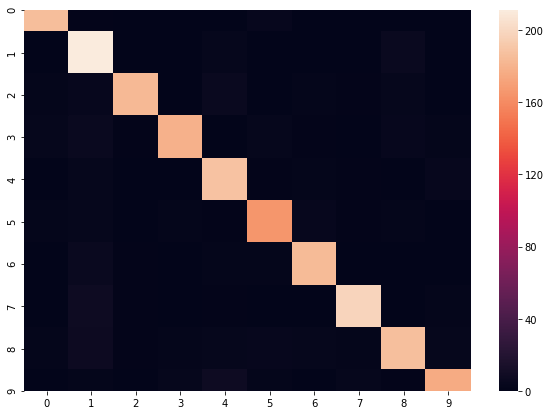

Accuracy: 0.9285, Précision: 0.9285, Recall:0.9285, Temps d'apprentissage: 1.9417736530303955 seconde, Temps prédiction: 1.597715139389038 secondes
 


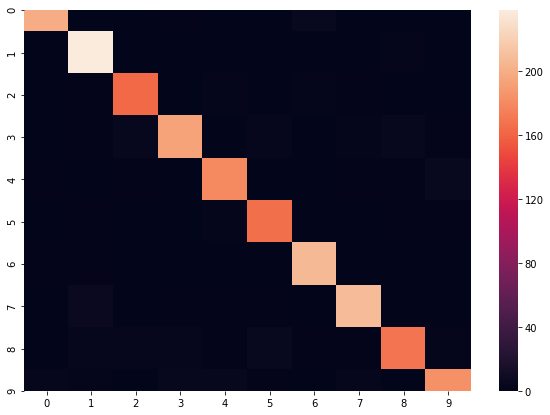

Accuracy: 0.9545, Précision: 0.9545, Recall:0.9545, Temps d'apprentissage: 16.161839485168457 seconde, Temps prédiction: 3.889568567276001 secondes
 


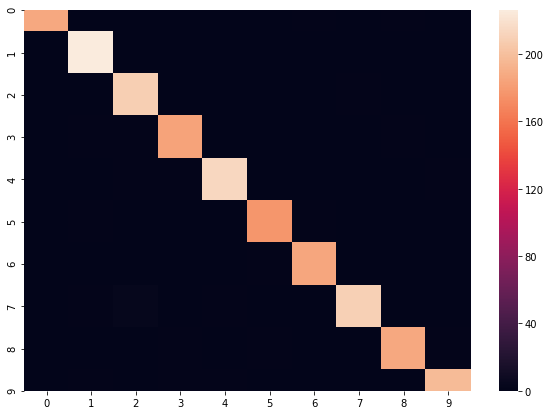

Accuracy: 0.9885, Précision: 0.9885, Recall:0.9885, Temps d'apprentissage: 126.84794211387634 seconde, Temps prédiction: 9.185443878173828 secondes
 


In [21]:
from sklearn import svm 

for aset in sets:
    xtrain, xtest, ytrain, ytest = aset
    tps1=time()
    clf= svm.SVC(kernel="poly",gamma="auto").fit(xtrain,ytrain)
    tps2=time()
    tpsapp=tps2-tps1
    score=clf.score(xtest,ytest)
    tps1=time()
    ypred=ypred=clf.predict(xtest)
    tps2=time()
    tpspred=tps2-tps1
    
    prec=precision_score(ytest,ypred,average="micro")
    recall=recall_score(ytest,ypred,average="micro")
    
    cm = confusion_matrix(ytest, ypred, labels=clf.classes_)
    df_cm= pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm)
    plt.show()
        
    print(f"Accuracy: {score}, Précision: {prec}, Recall:{recall}, Temps d'apprentissage: {tpsapp} seconde, Temps prédiction: {tpspred} secondes")
    print(" ")